In [3]:
%pip install -qqq rsnl;

Note: you may need to restart the kernel to use updated packages.


In [4]:
# shouldn't have to do this...
%pip install -qqq matlabengine==23.2.3;

Note: you may need to restart the kernel to use updated packages.


In [5]:
from rsnl.inference import run_rsnl
from rsnl.model import get_robust_model
from rsnl.visualisations import plot_and_save_all


In [6]:
import jax
import flowjax
print("JAX version:", jax.__version__)
print("FlowJAX version:", flowjax.__version__)


JAX version: 0.4.23
FlowJAX version: 8.1.0


In [7]:
from mm_sbi_review.examples.misspec_ma1 import assumed_dgp,autocov, calculate_summary_statistics, true_dgp

In [8]:
import jax.numpy as jnp
import jax.random as random
import pickle as pkl
import os
import arviz as az
import numpyro.distributions as dist  # type: ignore
from functools import partial


In [9]:

def get_prior():
    """Return prior for inference on misspec MA(1)."""
    return dist.Uniform(low=jnp.array([-1.0]),
                        high=jnp.array([1.0]))


/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,
sample: 100%|██████████| 2250/2250 [00:00<00:00, 2511.70it/s, 15 steps of size 3.71e-01. acc. prob=0.83]


Round 1 MCMC took 5.07 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -0.04      1.53      0.02     -2.68      2.46    535.87      1.01
adj_params[1]     -0.01      1.43     -0.02     -2.57      2.08    514.64      1.00
     theta[0]     -0.02      0.57     -0.03     -0.98      0.80    854.85      1.01

Number of divergences: 0
Round 1 simulations took 0.25 seconds


100%|██████████| 500/500 [00:08<00:00, 57.55it/s, train=0.204, val=0]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 1 flow training took 8.85 seconds


sample: 100%|██████████| 2250/2250 [00:03<00:00, 630.87it/s, 31 steps of size 1.59e-01. acc. prob=0.87] 


Round 2 MCMC took 30.85 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.37      0.39     -2.36     -2.99     -1.76    217.99      1.02
adj_params[1]      0.12      1.59      0.09     -2.28      2.51    154.40      1.03
     theta[0]      0.02      0.11      0.02     -0.15      0.21    117.32      1.04

Number of divergences: 0
Round 2 simulations took 0.01 seconds


100%|██████████| 500/500 [00:15<00:00, 32.32it/s, train=0.528, val=0]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 2 flow training took 15.69 seconds


sample: 100%|██████████| 2250/2250 [00:03<00:00, 621.26it/s, 15 steps of size 2.10e-01. acc. prob=0.76] 


Round 3 MCMC took 28.88 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.57      0.33     -2.55     -3.14     -2.09    413.01      1.01
adj_params[1]     -0.11      1.38     -0.04     -2.24      1.84    492.62      1.01
     theta[0]      0.01      0.11      0.00     -0.18      0.17    133.66      1.02

Number of divergences: 1
Round 3 simulations took 0.01 seconds


 17%|█▋        | 84/500 [00:07<00:35, 11.63it/s, train=0.957, val=0.902 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 3 flow training took 7.51 seconds


sample: 100%|██████████| 2250/2250 [00:03<00:00, 647.43it/s, 7 steps of size 4.55e-01. acc. prob=0.81] 


Round 4 MCMC took 28.21 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.72      0.42     -2.69     -3.44     -2.06    605.85      1.00
adj_params[1]      0.04      1.44      0.03     -2.01      2.54    509.21      1.00
     theta[0]      0.01      0.11      0.01     -0.15      0.20    464.93      1.00

Number of divergences: 0
Round 4 simulations took 0.01 seconds


 14%|█▎        | 68/500 [00:06<00:40, 10.56it/s, train=1.14, val=1.22 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 4 flow training took 6.73 seconds


sample: 100%|██████████| 2250/2250 [00:03<00:00, 592.95it/s, 7 steps of size 4.95e-01. acc. prob=0.79] 


Round 5 MCMC took 32.19 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.77      0.43     -2.78     -3.48     -2.11    664.73      1.01
adj_params[1]     -0.02      1.45     -0.01     -1.88      2.80    679.14      1.00
     theta[0]      0.01      0.12      0.01     -0.18      0.18    598.40      1.00

Number of divergences: 0
Round 5 simulations took 0.01 seconds


  6%|▌         | 29/500 [00:05<01:26,  5.42it/s, train=1.29, val=1.65 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 5 flow training took 5.65 seconds


sample: 100%|██████████| 2250/2250 [00:03<00:00, 696.17it/s, 7 steps of size 4.07e-01. acc. prob=0.83] 


Round 6 MCMC took 31.19 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.78      0.49     -2.79     -3.58     -2.14    319.36      1.01
adj_params[1]      0.07      1.35      0.03     -2.12      2.29    714.25      1.00
     theta[0]      0.01      0.11      0.01     -0.16      0.18    585.61      1.00

Number of divergences: 0
Round 6 simulations took 0.01 seconds


  7%|▋         | 37/500 [00:06<01:18,  5.86it/s, train=1.42, val=1.52 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 6 flow training took 6.61 seconds


sample: 100%|██████████| 2250/2250 [00:04<00:00, 497.46it/s, 7 steps of size 4.43e-01. acc. prob=0.81]  


Round 7 MCMC took 34.22 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.85      0.40     -2.84     -3.53     -2.25    586.22      1.00
adj_params[1]     -0.03      1.51      0.03     -2.55      2.49    668.11      1.00
     theta[0]      0.01      0.11      0.01     -0.18      0.20    714.41      1.00

Number of divergences: 0
Round 7 simulations took 0.01 seconds


  9%|▉         | 45/500 [00:08<01:23,  5.43it/s, train=1.53, val=1.59 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 7 flow training took 8.67 seconds


sample: 100%|██████████| 2250/2250 [00:04<00:00, 559.94it/s, 7 steps of size 4.48e-01. acc. prob=0.80] 


Round 8 MCMC took 37.16 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.82      0.48     -2.81     -3.55     -2.01    507.74      1.00
adj_params[1]      0.01      1.52      0.07     -2.38      2.44    517.44      1.00
     theta[0]      0.00      0.11      0.00     -0.19      0.18    571.71      1.00

Number of divergences: 0
Round 8 simulations took 0.01 seconds


 11%|█         | 53/500 [00:09<01:20,  5.56it/s, train=1.62, val=1.59 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 8 flow training took 9.87 seconds


sample: 100%|██████████| 2250/2250 [00:04<00:00, 483.58it/s, 3 steps of size 4.09e-01. acc. prob=0.83]  


Round 9 MCMC took 35.05 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.84      0.42     -2.84     -3.46     -2.07    690.02      1.00
adj_params[1]     -0.02      1.58     -0.02     -2.53      2.25    430.31      1.00
     theta[0]      0.02      0.10      0.02     -0.15      0.18    560.76      1.00

Number of divergences: 0
Round 9 simulations took 0.01 seconds


 11%|█         | 56/500 [00:10<01:26,  5.13it/s, train=1.69, val=1.61 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:160: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 9 flow training took 11.35 seconds


sample: 100%|██████████| 2250/2250 [00:03<00:00, 623.27it/s, 7 steps of size 4.42e-01. acc. prob=0.82]  


Round 10 MCMC took 37.58 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.85      0.42     -2.86     -3.57     -2.18    537.70      1.00
adj_params[1]      0.03      1.32      0.00     -2.09      2.05    642.32      1.01
     theta[0]      0.02      0.12      0.02     -0.17      0.23    510.27      1.00

Number of divergences: 0
Round 10 simulations took 0.01 seconds


  7%|▋         | 37/500 [00:10<02:11,  3.51it/s, train=1.73, val=1.89 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:384: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 10 flow training took 11.16 seconds


sample: 100%|██████████| 12000/12000 [00:10<00:00, 1177.10it/s, 5 steps of size 5.89e-01. acc. prob=0.73]


Final posterior MCMC took 54.93 seconds
Total MCMC time: 355.32 seconds
Total simulation time: 0.31 seconds
Total flow training time: 92.09 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.89      0.45     -2.88     -3.60     -2.14  23040.18      1.00
adj_params[1]     -0.02      1.43     -0.01     -2.31      2.32  21234.48      1.00
     theta[0]      0.02      0.11      0.02     -0.17      0.20  21642.42      1.00

Number of divergences: 0


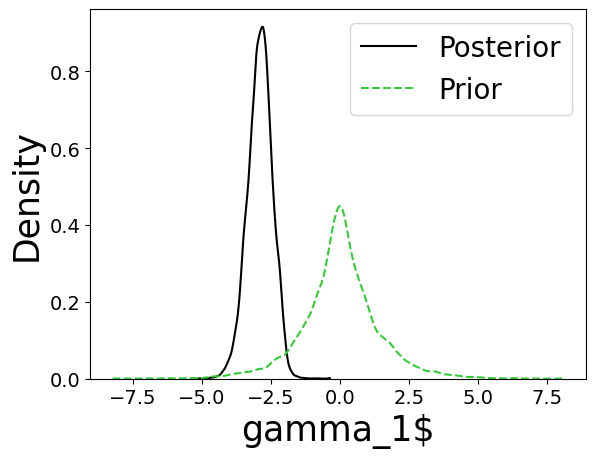

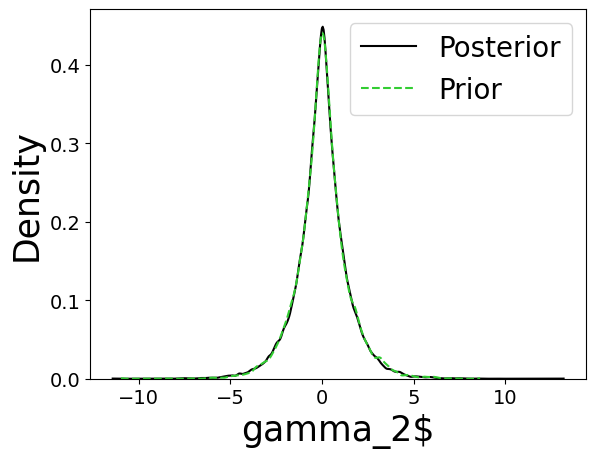

<Figure size 640x480 with 0 Axes>

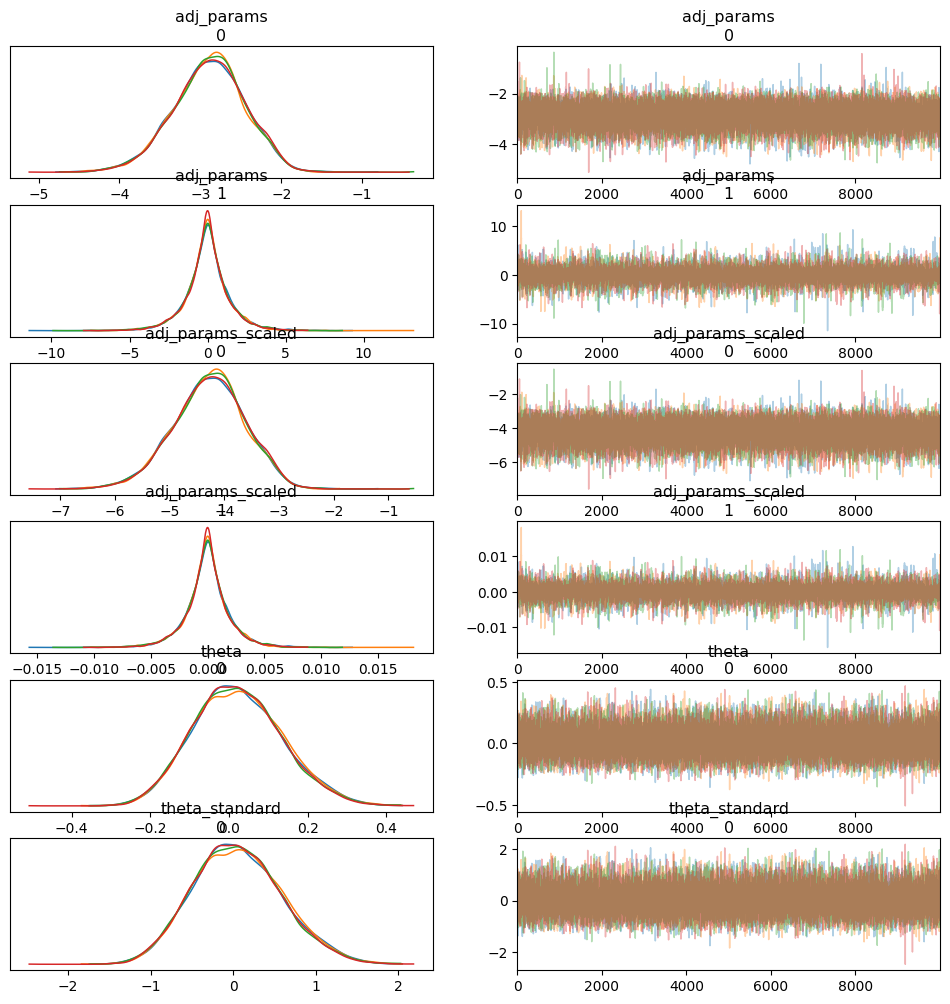

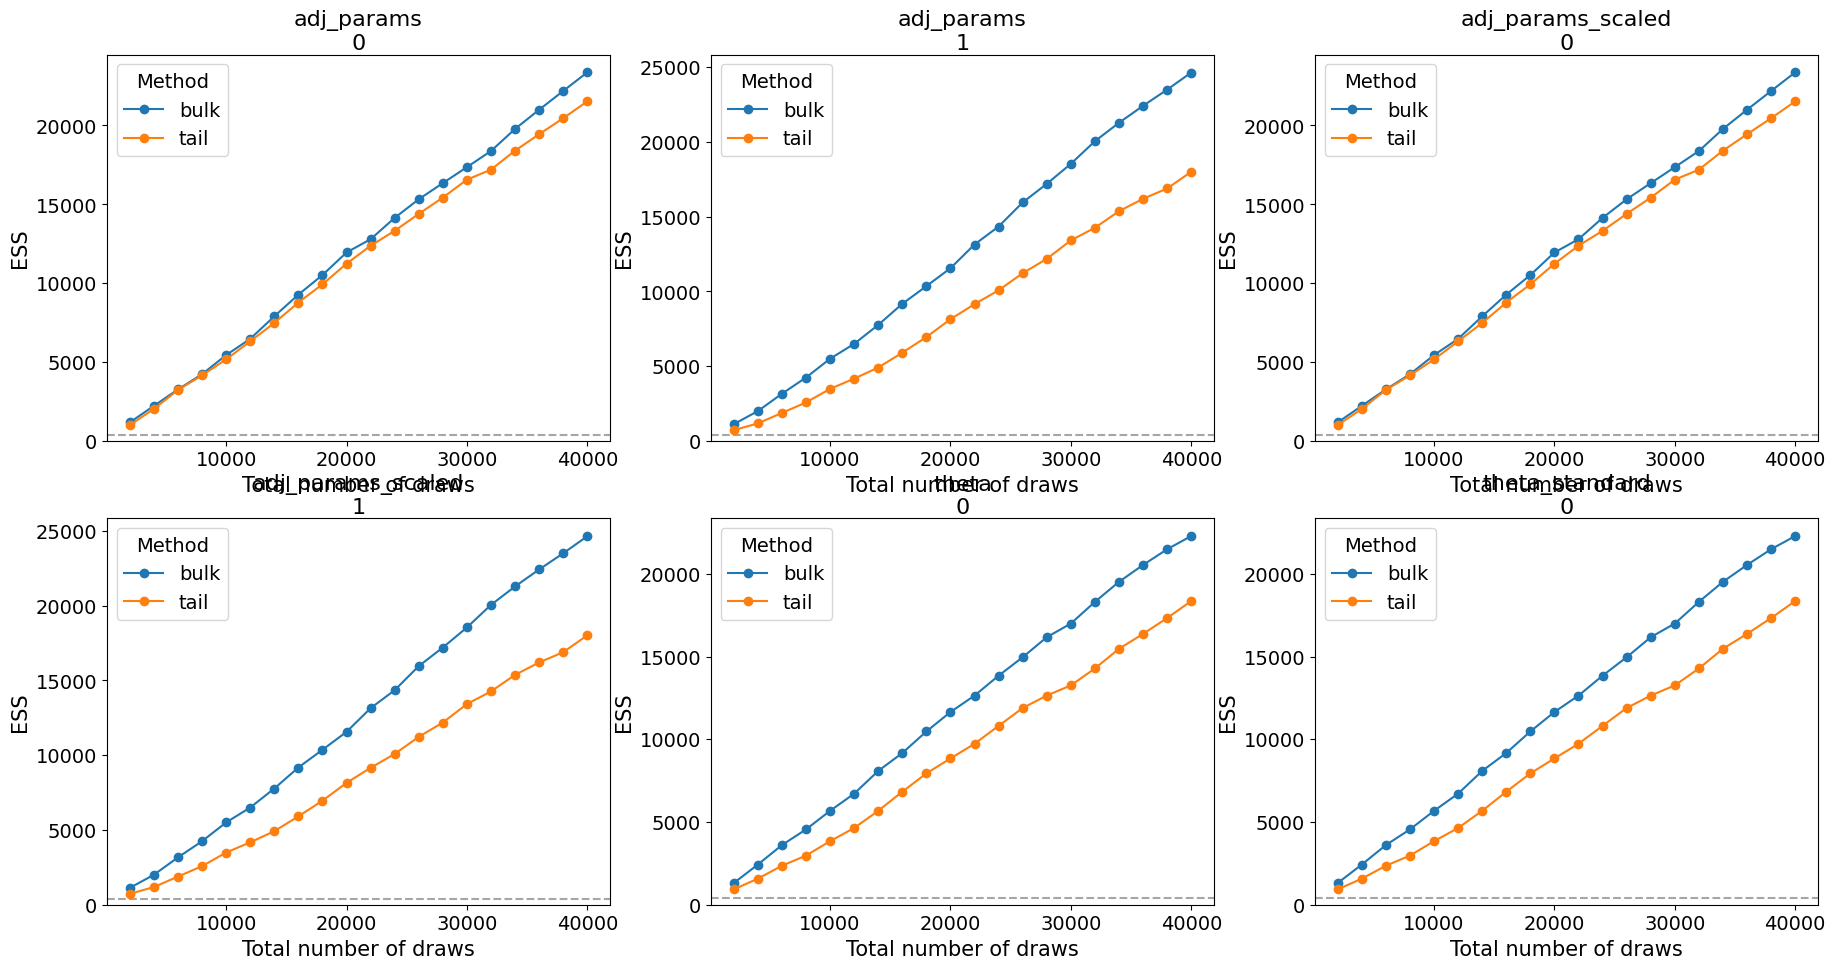

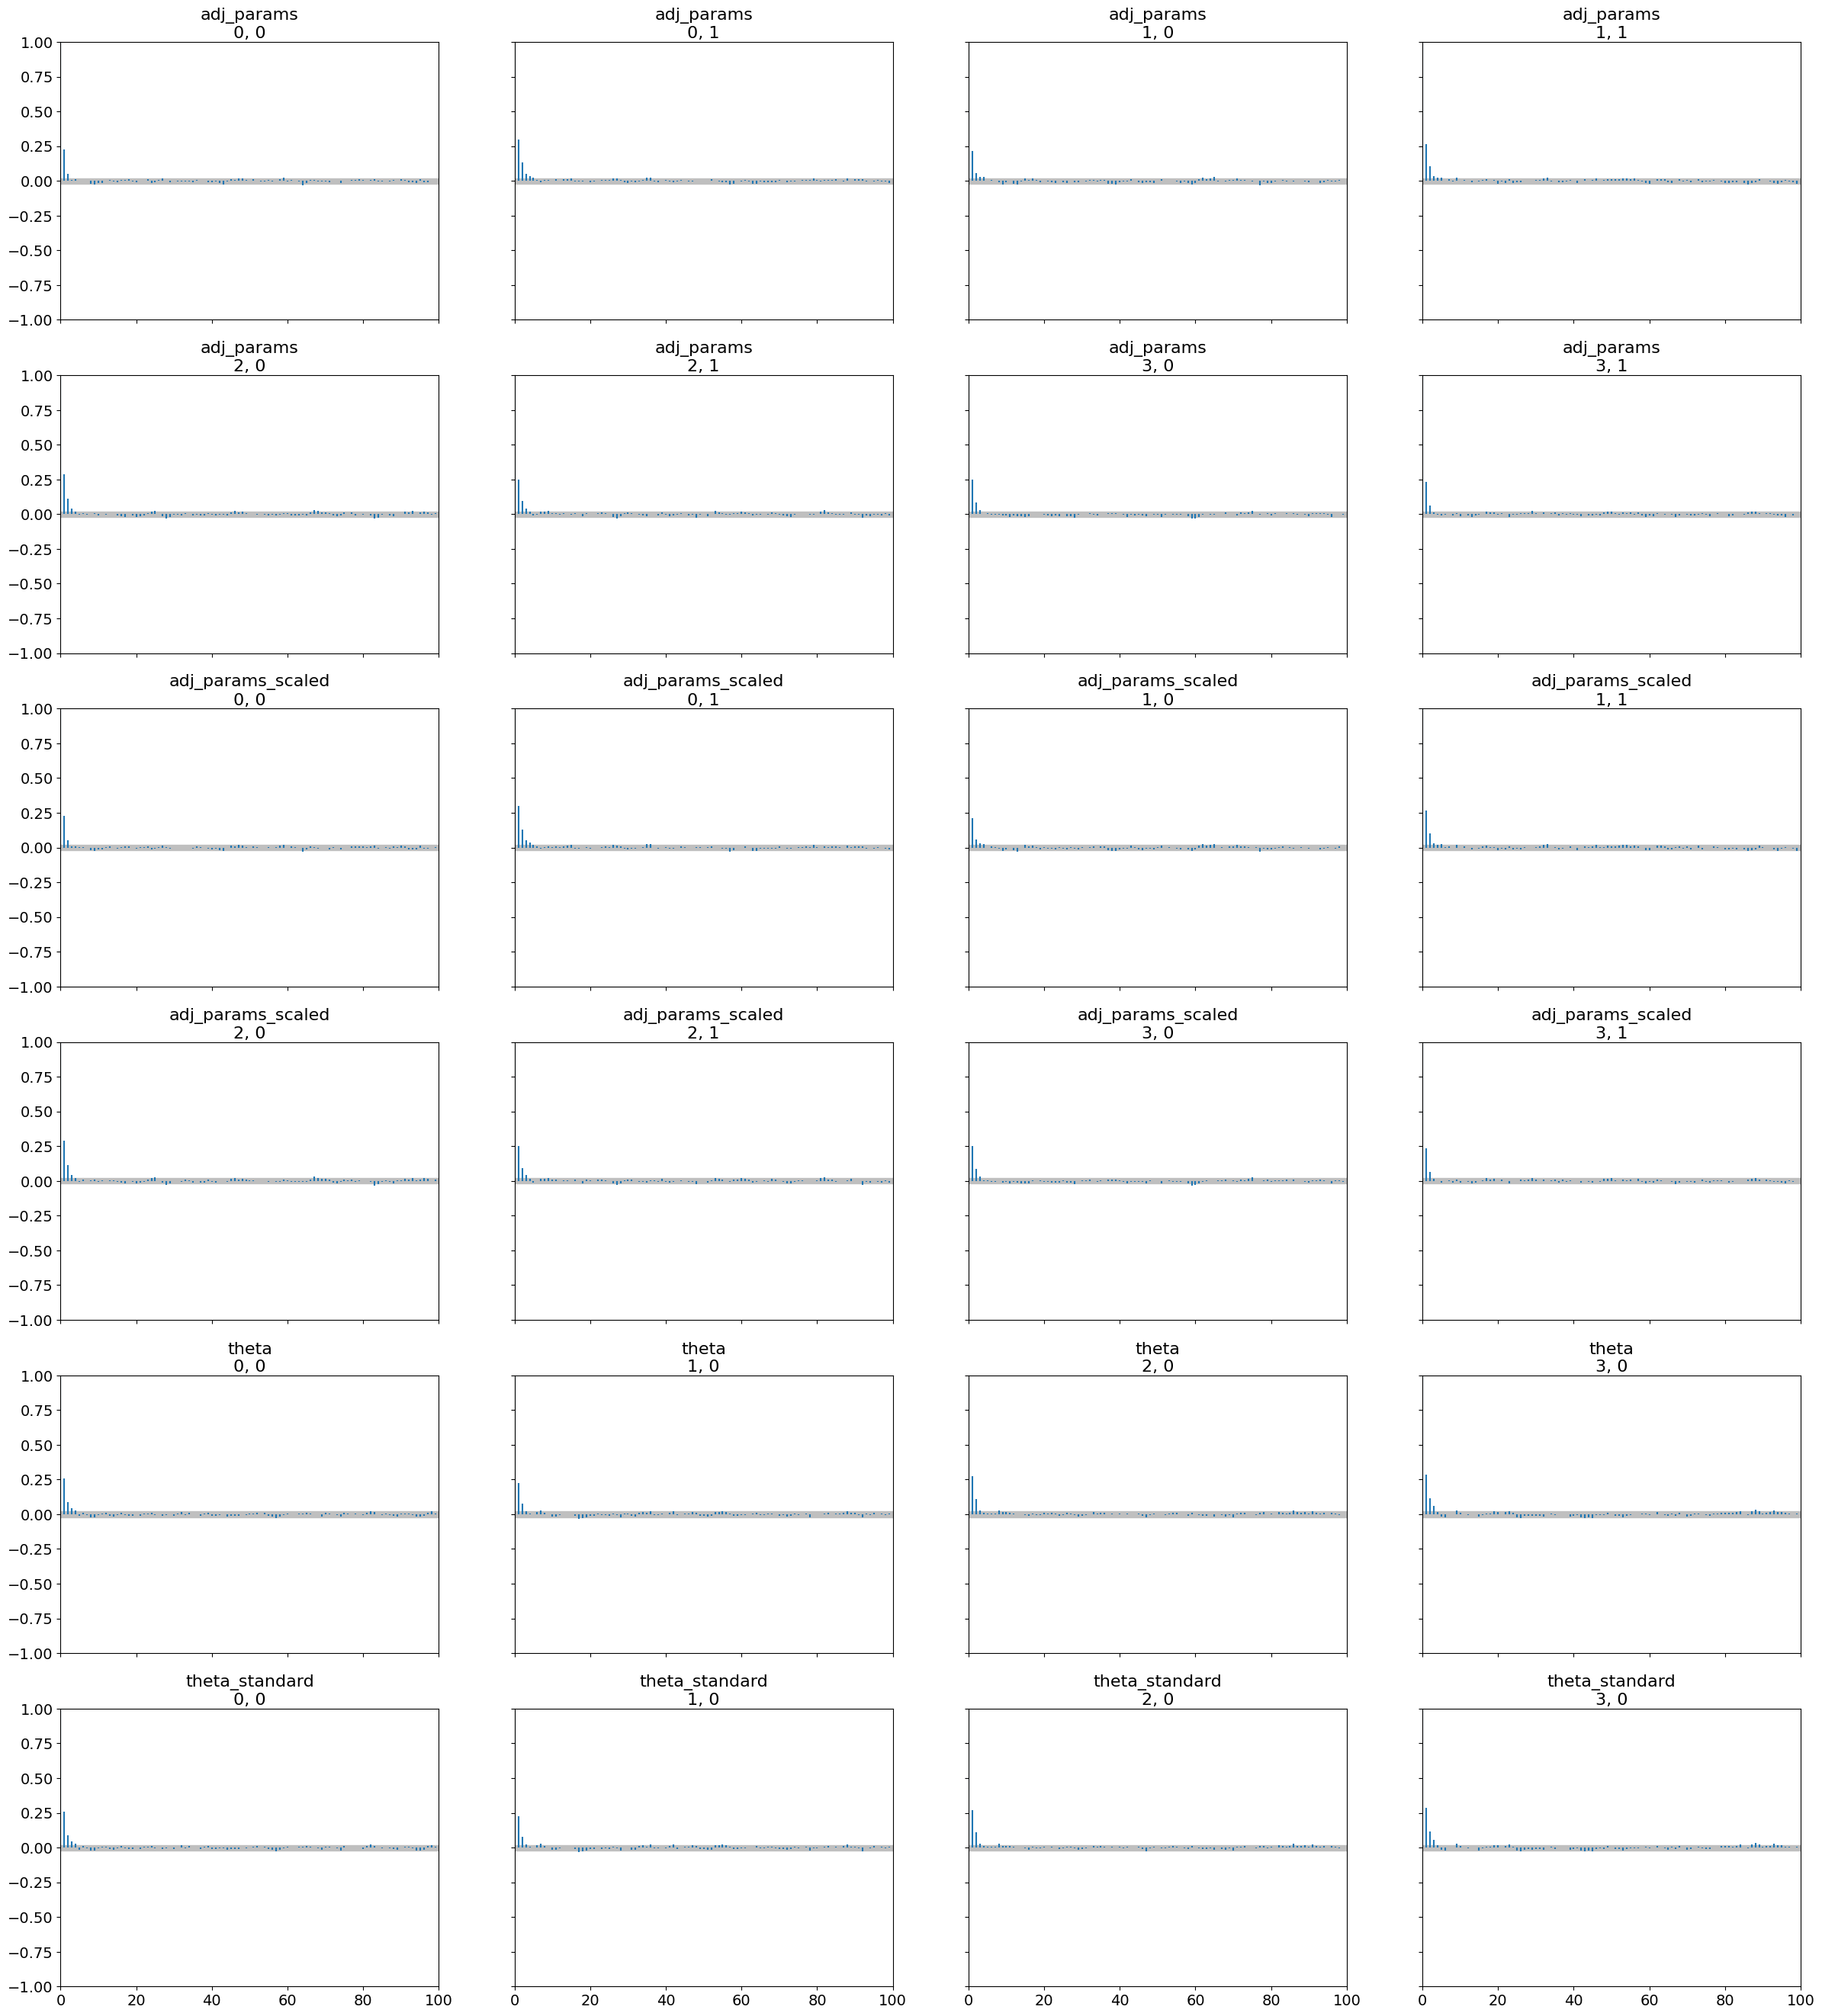

In [10]:
seed = 0
folder_name = "fig/misspec_ma1/"
model = get_robust_model
prior = get_prior()
rng_key = random.PRNGKey(seed)
rng_key, sub_key = random.split(rng_key)
sim_fn = partial(assumed_dgp, n_obs=100)
sum_fn = calculate_summary_statistics
pseudo_true_param = jnp.array([0.0])
x_obs = true_dgp(key=sub_key, n_obs=100)
x_obs = calculate_summary_statistics(x_obs)
# x_obs = jnp.array([0.01, 0])
mcmc = run_rsnl(model, prior, sim_fn, sum_fn,
                                                rng_key, x_obs,
                                                jax_parallelise=True,
                                                true_params=pseudo_true_param
                                                )
mcmc.print_summary()
isExist = os.path.exists(folder_name)
if not isExist:
    os.makedirs(folder_name)
inference_data = az.from_numpyro(mcmc)

with open(f'{folder_name}thetas.pkl', 'wb') as f:
    pkl.dump(inference_data.posterior.theta, f)

with open(f'{folder_name}adj_params.pkl', 'wb') as f:
    pkl.dump(inference_data.posterior.adj_params, f)

plot_and_save_all(inference_data, pseudo_true_param,
                    folder_name=folder_name)


In [11]:
import numpy as np
posterior_samples = inference_data.posterior.theta
posterior_samples = np.ravel(np.concatenate(posterior_samples, axis=0))
np.std(posterior_samples)

0.11266525

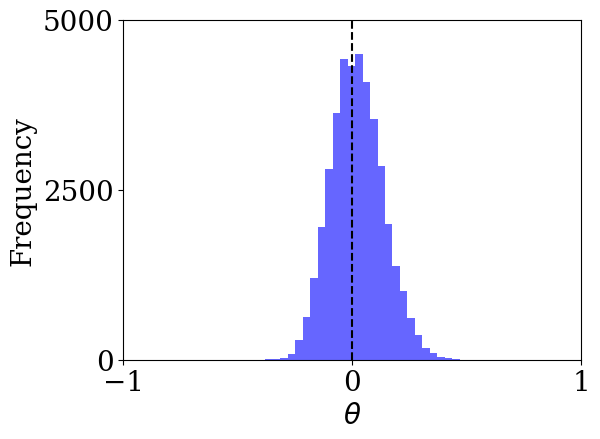

In [19]:
import matplotlib.pyplot as plt

thetas = posterior_samples
plt.rcParams.update({
    # "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Match LaTeX's default serif font
    "font.size": 20,  # Adjust font size to match main text
    "axes.labelsize": 20,  # Match axis label size
    "axes.titlesize": 20,  # Match title size
    "legend.fontsize": 18,  # Match legend font size
    "xtick.labelsize": 20,  # Match tick label size
    "ytick.labelsize": 20,  # Match tick label size
})


# plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(thetas, bins=30, color='blue', alpha=0.6)  # Histogram with 30 bins
# plt.title('Posterior Distribution of Theta')  # Title of the plot
plt.xlabel(r'$\theta$')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
# plt.title("RSNL", fontsize=24)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enable grid with custom settings
plt.axvline(x=0, color='black', linestyle='--', label='Pseudo-true θ')  # Add vertical line at x=0
# plt.text(np.mean(thetas), plt.ylim()[1] * 0.9, color='red')  # Text label for mean
plt.xlim([-1, 1])  # Set x-axis limits
# plt.legend(fontsize=22)

plt.xticks([-1, 0, 1])
plt.yticks([0, 2500, 5000])
plt.tight_layout()
plt.savefig("rsnl.pdf")
plt.show()  # Show the plot
# plt.tight_layout()

# Example usage:
# Assuming 'thetas' is your array of theta values
# plot_theta_histogram(thetas)

with open(f'thetas.pkl', 'wb') as f:
    thetas = pkl.dump(posterior_samples[::4], f)  # cut down to 10000 samples

In [20]:




def b_theta(t):
    return np.array([1 + t ** 2, t])
key = random.PRNGKey(0)
# Generate values for b_theta
t_vals = np.linspace(-1, 1, 101)
b_theta_vals = np.array([b_theta(t) for t in t_vals])
# Plot the histogram of posterior samples
# plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=50, density=True, alpha=0.6, color='blue', label='Posterior Samples')

# Plot the prior distribution for comparison
theta_range = np.linspace(-1, 1, 200)

# Plot the pseudo-true parameter value
theta_pseudo_true = 0.0  # Adjust based on your context
plt.axvline(theta_pseudo_true, color='black', linestyle='--', label='Pseudo-true θ')

plt.xticks([-1, 0, 1])
# Add labels and legend
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
# plt.title('Posterior Distribution of $\theta$')
plt.legend()
plt.tight_layout()
plt.savefig("figs/fig2a.pdf")
plt.clf()

# Posterior predictive simulations
num_posterior_samples = len(posterior_samples)
num_pp_samples = 2_000  # Number of posterior predictive samples

# Initialize array to store summary statistics
posterior_pred_sims = np.empty((num_pp_samples, 2))

# Perform posterior predictive simulations
for i in range(num_pp_samples):
    key, subkey = random.split(key)
    t1 = posterior_samples[i]
    y = sim_fn(subkey, t1)
    posterior_pred_sims[i, 0] = autocov(y, lag=0)
    posterior_pred_sims[i, 1] = autocov(y, lag=1)

# Plot the joint distribution of summary statistics from posterior predictive simulations
# plt.figure(figsize=(8, 6))
# plt.rcParams.update({'font.size': 24})
plt.rcParams.update({
    # "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Match LaTeX's default serif font
    "font.size": 20,  # Adjust font size to match main text
    "axes.labelsize": 20,  # Match axis label size
    "axes.titlesize": 20,  # Match title size
    "legend.fontsize": 18,  # Match legend font size
    "xtick.labelsize": 20,  # Match tick label size
    "ytick.labelsize": 20,  # Match tick label size
})
plt.scatter(posterior_pred_sims[:, 1], posterior_pred_sims[:, 0], c='blue', alpha=0.1)

# Plot the observed summary statistics
plt.scatter(x_obs[1], x_obs[0], c='black', marker='x', s=100, label=r'$S(\mathbf{y})$')

# Plot the b_theta function for reference
plt.plot(b_theta_vals[:, 1], b_theta_vals[:, 0], color='orange', label=r'$b(\theta)$', linewidth=4)

# Set axis limits and labels
plt.xlim(-2.0, 2.0)
plt.xticks([-2, 0, 2])
plt.ylim(-0.5, 2.5)
plt.yticks([-0.5, 1, 2.5])
plt.xlabel(r'$\zeta_1$')
plt.ylabel(r'$\zeta_2$')
# plt.title('Posterior Predictive Summary Statistics')
plt.legend()
plt.tight_layout()
plt.savefig("figs/rsnl_ppc.pdf")
plt.clf()


<Figure size 640x480 with 0 Axes>

In [14]:
adj_params = np.concatenate(inference_data.posterior.adj_params, axis=0)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import elfi.visualization.visualization

# Define the number of bins
mbins = 30

# Assuming adj_params is a 2D array with shape (num_samples, num_params)
# Extract gamma values from the results
gamma_dict = dict(zip(['gamma_{}'.format(index) for index in range(adj_params.shape[1])], adj_params.T))

# Set global font size
plt.rcParams.update({'font.size': 24})

# Plot the marginal distributions
for i, (key, values) in enumerate(gamma_dict.items()):
    plt.figure(figsize=(8, 6))
    
    # Plot the posterior distribution as a histogram
    plt.hist(values, bins=mbins, density=True, alpha=0.8, color='black', label='Posterior')
    
    # Plot the prior distribution (Laplace(0, 1))
    x = np.linspace(-10, 10, 1000)
    prior = stats.laplace.pdf(x, loc=0, scale=1)
    plt.plot(x, prior, 'green', linestyle='dashed', lw=3, label='Prior')
    
    plt.xlim([-10, 10])
    plt.xticks([-10, -5, 0, 5, 10])
    plt.xlabel(r"$\gamma_{}$".format(str(i+1)))
    plt.ylabel('Density')
    plt.legend(fontsize=22)
    plt.tight_layout()
    plt.savefig(f"rsnl_adj_param_{str(i)}.pdf")
    plt.clf()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>